<a href="https://colab.research.google.com/github/Kaxut/Imersao_dados/blob/main/IMERS%C3%83O_DADOS_Aula_03_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Aula 03

###Desafio 01: Criar tabelas de frequência com pandas.groupby()

###Desafio 02: Normalizar o crosstab pela coluna.

###Desafio 03: Explorar outros agregadores.

###Desafio 04: Explorar o melt.

###Desafio 05: Calcular e analisar a correlação entre G e C. Refletir sobre os efeitos biológicos. 

###Desafio 06: Estudar o código que plota a matriz de correlação (heatmap)

###Desafio 07: Resumo do que você aprendeu com os dados



In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

dados = pd.read_csv(url_dados, compression = 'zip')

mapa = {'droga': 'composto'}
dados.rename(columns=mapa, inplace=True)

dados.columns = dados.columns.str.replace('-', '')
dados.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


#Desafio 01: Criar tabelas de frequência com pandas.groupby()

In [3]:
dados.groupby(by=['dose', 'tempo'])['tratamento'].value_counts()

dose  tempo  tratamento  
D1    24     com_droga       3585
             com_controle     301
      48     com_droga       4011
             com_controle     343
      72     com_droga       3600
             com_controle     307
D2    24     com_droga       3581
             com_controle     305
      48     com_droga       3591
             com_controle     305
      72     com_droga       3580
             com_controle     305
Name: tratamento, dtype: int64

In [4]:
dados.groupby(by=['tempo'])['tratamento'].value_counts()

tempo  tratamento  
24     com_droga       7166
       com_controle     606
48     com_droga       7602
       com_controle     648
72     com_droga       7180
       com_controle     612
Name: tratamento, dtype: int64

#Desafio 02: Normalizar o crosstab pela coluna.

In [5]:
pd.crosstab([dados['dose'], dados['tempo']], dados ['tratamento'], normalize = 'columns')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.161308   0.163341
     48         0.183816   0.182750
     72         0.164523   0.164024
D2   24         0.163451   0.163158
     48         0.163451   0.163614
     72         0.163451   0.163113

#Desafio 03: Explorar outros agregadores.

In [6]:
pd.pivot_table(dados, index='tratamento', aggfunc='mean')

,c0,c1,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19,c2,c20,c21,c22,c23,c24,c25,c26,c27,c28,c29,c3,c30,c31,c32,c33,c34,c35,c36,c37,c38,c39,c4,c40,c41,c42,c43,c44,...,g759,g76,g760,g761,g762,g763,g764,g765,g766,g767,g768,g769,g77,g770,g771,g78,g79,g8,g80,g81,g82,g83,g84,g85,g86,g87,g88,g89,g9,g90,g91,g92,g93,g94,g95,g96,g97,g98,g99,tempo
tratamento,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
com_controle,0.127822,0.194264,0.241917,0.246343,0.089988,0.460738,0.200500,0.071257,0.010165,0.304032,0.224250,0.188864,0.241960,0.088708,0.167343,0.044982,0.112457,0.247431,0.120005,0.212642,0.271673,0.097347,0.201318,0.000209,0.192237,0.138629,0.212752,0.252185,0.142937,0.025979,0.174798,0.186405,0.192593,0.043842,0.218791,0.253228,0.180297,0.074308,0.249184,0.266653,...,0.031986,0.280588,0.099545,0.055577,0.020298,0.035197,-0.693183,-0.249079,-0.034339,-0.264098,-0.242252,-0.361357,-0.340619,0.187241,-0.253532,0.072318,0.043636,0.395450,0.283770,-0.035760,0.095441,-0.233981,-0.028609,0.006862,-0.068261,-0.088862,0.190774,-0.313477,0.303675,-0.193242,-0.262125,-0.246121,0.023287,-0.213898,-0.235452,-0.038555,0.372568,0.174032,0.037182,48.077170
com_droga,-0.396219,-0.510589,-0.547917,-0.534603,-0.558939,-0.593514,-0.349635,-0.496805,-0.366806,-0.539853,-0.691193,-0.374535,-0.541969,-0.500319,-0.552461,-0.419532,-0.330352,-0.502117,-0.498118,-0.666627,-0.491717,-0.552773,-0.330641,-0.409792,-0.434603,-0.483140,-0.368538,-0.613525,-0.512918,-0.382462,-0.532469,-0.242944,-0.665219,-0.434946,-0.554115,-0.540906,-0.525415,-0.530279,-0.511821,-0.491999,...,-0.038580,-0.029167,-0.443168,-0.372523,0.223198,0.006947,0.244502,0.023690,-0.224717,-0.060281,0.166164,-0.108179,-0.068294,-0.253766,0.131711,0.004636,-0.010477,-0.239865,-0.115121,0.028944,0.226994,0.286007,0.263545,0.049429,0.356935,-0.097289,0.103261,0.013485,0.104281,0.224465,0.464056,0.074608,0.100897,-0.006489,0.227241,-0.451876,0.206575,-0.296023,-0.032029,48.015309


In [7]:
dados.agg({'tempo' : ['max', 'min'], 'dose' : ['min', 'max']})

,tempo,dose
max,72,D2
min,24,D1


#Desafio 04: Explorar o melt.

In [8]:
pd.melt(dados, id_vars= ['tempo', 'dose'])

,tempo,dose,variable,value
0,24,D1,id,id_000644bb2
1,72,D1,id,id_000779bfc
2,48,D1,id,id_000a6266a
3,48,D1,id,id_0015fd391
4,72,D2,id,id_001626bd3
...,...,...,...,...
20837245,24,D2,c99,0.468
20837246,24,D2,c99,0.3689
20837247,48,D2,c99,0.3808
20837248,24,D1,c99,0.074


#Desafio 05: Calcular e analisar a correlação entre G e C. Refletir sobre os efeitos biológicos. 

In [9]:
g = pd.DataFrame(dados[dados['dose'] == 'D1'].loc[:,'g0':'g20'])
c = pd.DataFrame(dados[dados['dose'] == 'D1'].loc[:,'c0':'c20'])
gc = pd.concat([g, c], axis =1, join = 'inner')
gc = gc.corr()
gc_corr = gc.loc['c0':'c20','g0':'g20']
gc_corr

,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20
c0,-0.623017,0.088438,-0.120350,0.026657,-0.342211,0.249706,-0.160182,0.542364,0.609272,0.483679,0.630494,-0.230474,0.420479,-0.526453,0.469443,0.095657,0.611331,0.571865,0.112343,0.215256,0.451062
c1,-0.634405,0.080976,-0.132486,-0.014924,-0.330921,0.240248,-0.121942,0.619943,0.592669,0.526990,0.685876,-0.238853,0.459162,-0.557750,0.495893,0.114241,0.609376,0.559550,0.074919,0.170210,0.388725
c2,-0.647538,0.075728,-0.127077,-0.006954,-0.344541,0.253822,-0.117460,0.630551,0.587203,0.543295,0.687049,-0.243346,0.457262,-0.566173,0.497628,0.130532,0.632483,0.571614,0.091147,0.184714,0.435836
c3,-0.610505,0.126183,-0.118838,0.035102,-0.311899,0.235577,-0.143017,0.570954,0.572938,0.508418,0.639488,-0.224634,0.421652,-0.523458,0.498313,0.088567,0.602495,0.553980,0.119921,0.197533,0.416075
c4,-0.609930,0.080492,-0.128943,0.005350,-0.317498,0.252914,-0.097420,0.616950,0.531356,0.542249,0.667887,-0.235149,0.480560,-0.539962,0.497844,0.115692,0.616297,0.557647,0.079127,0.158789,0.430631
c5,-0.636441,0.114101,-0.119217,0.012362,-0.337949,0.244448,-0.130844,0.596007,0.587125,0.516089,0.666477,-0.233107,0.458430,-0.548976,0.503831,0.080227,0.619931,0.573055,0.078648,0.178459,0.439632
c6,-0.687514,0.083976,-0.132027,-0.040064,-0.332771,0.235634,-0.132406,0.649074,0.609295,0.543442,0.709310,-0.233641,0.460450,-0.579153,0.473391,0.150934,0.613337,0.563337,0.043948,0.162010,0.442318
c7,-0.611495,0.103107,-0.137253,0.034619,-0.335898,0.227351,-0.135293,0.538546,0.581432,0.481964,0.611265,-0.174409,0.417057,-0.484626,0.460414,0.098351,0.587960,0.550328,0.092528,0.184860,0.458418
c8,-0.652149,0.104522,-0.128815,0.011697,-0.330103,0.246830,-0.128618,0.626049,0.592076,0.526571,0.680370,-0.227949,0.452299,-0.547855,0.520377,0.118070,0.629190,0.566277,0.086552,0.179989,0.425481
c9,-0.650664,0.117683,-0.115849,-0.047422,-0.303492,0.201880,-0.126021,0.638338,0.557231,0.510497,0.690442,-0.212814,0.435033,-0.562435,0.486648,0.119515,0.568295,0.532306,0.050152,0.131499,0.434085


#Desafio 06: Estudar o código que plota a matriz de correlação (heatmap)

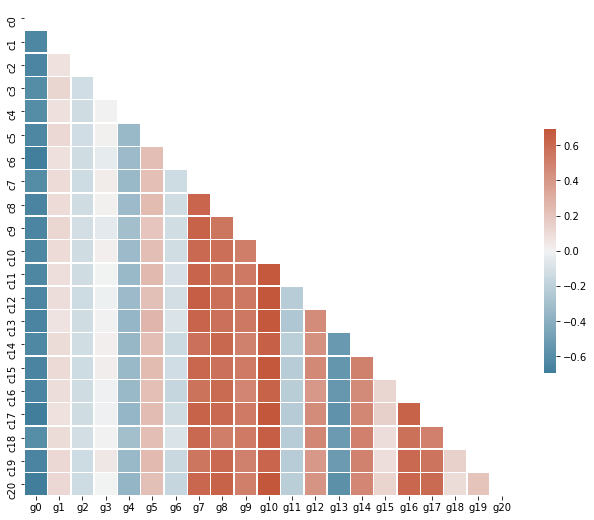

In [10]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(gc_corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(gc_corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()